In [63]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")

In [65]:
data.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [68]:
# Make a function that takes a list of state names and plots their new cases vs date
def  states_newcases(states):
    city = pd.DataFrame()
    for i in states:
        city=data[data["state"]==i]
        city['new'] = city['cases'].diff()
        plt.plot(city['date'], city['new'], label = i)
        
    plt.legend()
    plt.xlabel('date',fontsize=10) 
    plt.ylabel('new cases',fontsize=10) 
    plt.title('new Covid-19 cases vs date in selected states',fontsize=10,)
    plt.show()


/var/folders/07/s55yk2gx6s563l2wgppmd38w0000gn/T/ipykernel_19158/3403843102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city['new'] = city['cases'].diff()


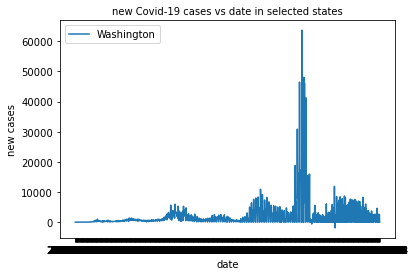

/var/folders/07/s55yk2gx6s563l2wgppmd38w0000gn/T/ipykernel_19158/3403843102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city['new'] = city['cases'].diff()
/var/folders/07/s55yk2gx6s563l2wgppmd38w0000gn/T/ipykernel_19158/3403843102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city['new'] = city['cases'].diff()
/var/folders/07/s55yk2gx6s563l2wgppmd38w0000gn/T/ipykernel_19158/3403843102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

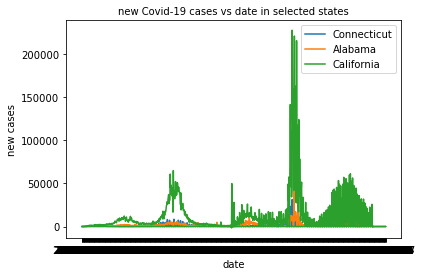

In [78]:
# test
dff = states_newcases(['Washington'])
dff = states_newcases(['Connecticut', 'Alabama', 'California'])

In [123]:
# Make a function that takes the name of a state and returns the date of its highest number of new cases. 
def max_case(state):
    city = pd.DataFrame()
    city=data[data["state"]==state]
    city['new'] = city['cases'].diff()
    num = city['new'].max()
    return  city.loc[city['new'] == num]['date'].to_string(index=False)

In [127]:
# test
max_case("Washington")

/var/folders/07/s55yk2gx6s563l2wgppmd38w0000gn/T/ipykernel_19158/2287473937.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city['new'] = city['cases'].diff()


'2022-01-18'

In [160]:
# Compare two states
from dateutil import parser
def compare_two_states(state1,state2):
    date1 = parser.parse(max_case(state1)) 
    date2 = parser.parse(max_case(state2))   
    if date1 == date2:
        print(state1 , 'and', state2, 'had their highest number of daily new cases the same day.')
    elif date1 > date2:
        diff = date1-date2
        print(state2 , 'had the highest number of daily new cases first', state1, 'and it is', str(diff.days), "days earlier.")
    elif date1 < date2:
        diff = date2 - date1     
        print(state1 , 'had the highest number of daily new cases first', state2, 'and it is', str(diff.days), "days earlier.")


In [161]:
compare_two_states("Washington","California")
compare_two_states("West Virginia","Connecticut")
compare_two_states("Wisconsin","New York")

California had the highest number of daily new cases first Washington and it is 8 days earlier.
West Virginia had the highest number of daily new cases first Connecticut and it is 7 days earlier.
New York had the highest number of daily new cases first Wisconsin and it is 9 days earlier.


/var/folders/07/s55yk2gx6s563l2wgppmd38w0000gn/T/ipykernel_19158/2287473937.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city['new'] = city['cases'].diff()
